In [116]:
%matplotlib inline
import numpy
from matplotlib import pyplot
import math
from numpy import linalg as la

def Hamiltonian(kx,ky, np, mp, nd, md):
    D0=-0.755
    tpp=-0.4
    tdp=0.8
    Up=5.
    Ud=7.2
    
    
    g1=-tpp*numpy.exp(1j*(kx/2.+ky/2.))-tpp*numpy.exp(1j*(-kx/2.-ky/2.))
    g0=tpp*numpy.exp(1j*(kx/2.-ky/2.))+tpp*numpy.exp(1j*(-kx/2.+ky/2.))
    d0=tdp*numpy.exp(-1j*kx/2.)
    d1=-tdp*numpy.exp(1j*kx/2.)
    d2=-tdp*numpy.exp(-1j*ky/2.)
    d3=tdp*numpy.exp(1j*ky/2.)
    
    g1d=-tpp*numpy.exp(-1j*(kx/2.+ky/2.))-tpp*numpy.exp(-1j*(-kx/2.-ky/2.))
    g0d=tpp*numpy.exp(-1j*(kx/2.-ky/2.))+tpp*numpy.exp(-1j*(-kx/2.+ky/2.))
    d0d=tdp*numpy.exp(1j*kx/2.)
    d1d=-tdp*numpy.exp(-1j*kx/2.)
    d2d=-tdp*numpy.exp(1j*ky/2.)
    d3d=tdp*numpy.exp(-1j*ky/2.)
    
    H=numpy.zeros((6,6),complex)
    H[0,:]=[-mp*Up+Up*np/2.,0.0,g0,g1,d0,d1]
    H[1,:]=[0.0,+mp*Up+Up*np/2.,g1,g0,d1,d0]
    H[2,:]=[g0d,g1d,-mp*Up+Up*np/2.,0.0,d2,d3]
    H[3,:]=[g1d,g0d,0.0,+mp*Up+Up*np/2.,d3,d2]
    H[4,:]=[d0d,d1d,d2d,d3d,D0-md*Ud+Ud*nd/2.,0.0]
    H[5,:]=[ d1d,d0d,d3d,d2d,0.0,D0+md*Ud+Ud*nd/2.]
    return H

1581.99583217
1581.99583217
1.47381605829


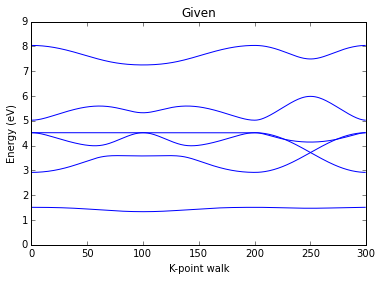

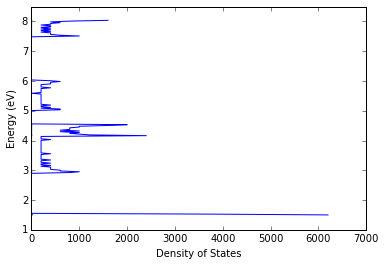

In [128]:

tol=1.E-6
Nk=100
dk=math.pi/Nk
eigenvals=numpy.zeros((6,3*Nk))
bands=numpy.zeros((6,3*Nk))
md=0.29
nd=1.384
mp=0.
x=0.
np=(5.+x-nd)/2.
#mu=4.9701
for i in range(3):
    for j in range(Nk):
        if i==0:
            kx=j*dk
            ky=0.
        if i==1:
            kx=math.pi
            ky=j*dk
        if i==2:
            kx=math.pi-j*dk
            ky=math.pi-j*dk
        H=Hamiltonian(kx,ky, np, mp, nd, md)    
        E,V = la.eig(H)
        eigenvals[:,i*Nk+j]=numpy.real(E)
        
        

for ii in range(len(eigenvals[0,:])):
    bands[:,ii]=numpy.sort(eigenvals[:,ii])
for ii in range(6):
    a=4
    pyplot.plot(bands[ii,:], 'b')
    
theory_bands=bands
pyplot.title("Given")
pyplot.ylabel("Energy (eV)")
pyplot.xlabel("K-point walk")
pyplot.ylim(0,9)
    
    
#Density of States

N=100
kx=numpy.linspace(-1.*math.pi, math.pi, N)
ky=numpy.linspace(-1.*math.pi, math.pi, N)

E=numpy.zeros(6.*N*N)
count=0;
for i in range(len(kx)):
    for j in range(len(ky)):
        H=Hamiltonian(kx[i],ky[i], np, mp, nd, md)    
        D,V = la.eig(H)
        for n in range(6):
            E[count]=numpy.real(D[n])
            count+=1

Emin=min(E)        
Emax=max(E)
n_bins=250
Es=numpy.linspace(Emin,Emax,n_bins)
hist, bin_edge= numpy.histogram(E,bins=Es)
    
S=numpy.sum((Es[1]-Es[0])*hist)
print S
pyplot.figure()
pyplot.plot(hist,bin_edge[1:])  
#pyplot.title("Density of States: Theory")
pyplot.ylabel("Energy (eV)")
pyplot.xlabel("Density of States")
pyplot.ylim(1,8.5)
S=numpy.sum((Es[1]-Es[0])*hist)
print S
c=6./S
hc=c*hist
  
doping =numpy.cumsum((Es[1]-Es[2])*hc)
  
ind=0
    
for ii in range(1,len(doping)):
    if doping[i]>=(nd+2*np) and doping[i-1]<=(nd+2*np):
        ind=i+1

    
Ef=Es[ind]
print Ef
pyplot.plot(hc, Es[1:])

Theory_hc=hc
Theory_Es=Es

In [118]:

def mu(np, mp, nd, md, Ud, Up, D0, TBpara):
    N=100
    kx=numpy.linspace(-1.*math.pi, math.pi, N)
    ky=numpy.linspace(-1.*math.pi, math.pi, N)
    
    #Finds energy bands on k-mesh
    E=numpy.zeros(6.*N*N)
    count=0;
    for i in range(len(kx)):
        for j in range(len(ky)):
            H=Hamiltonian2(kx[i],ky[i], np, mp, nd, md, Ud, Up, D0, TBpara)    
            D,V = la.eig(H)
            for n in range(6):
                E[count]=numpy.real(D[n])
                count+=1
    
    Emin=min(E)        
    Emax=max(E)
    n_bins=500
    Es=numpy.linspace(Emin,Emax,n_bins)
    hist, bin_edge= numpy.histogram(E,bins=Es)
    
    S=numpy.sum((Es[1]-Es[0])*hist)
    c=6./S
    hc=c*hist
    
    doping =numpy.cumsum((Es[1]-Es[2])*hc)
    
    ind=0
    
    for ii in range(1,len(doping)):
        if doping[i]>=(nd+2*np) and doping[i-1]<=(nd+2*np):
            ind=i+1
        else:
            a=4
       
    
    Ef=Es[ind]
    return Ef

def Hamiltonian2(kx,ky, np, mp, nd, md, Ud, Up, D0, TBpara):
    tpp=TBpara[0]
    tdp=TBpara[1]
    
    g1=-tpp*numpy.exp(1j*(kx/2.+ky/2.))-tpp*numpy.exp(1j*(-kx/2.-ky/2.))
    g0=tpp*numpy.exp(1j*(kx/2.-ky/2.))+tpp*numpy.exp(1j*(-kx/2.+ky/2.))
    d0=tdp*numpy.exp(-1j*kx/2.)
    d1=-tdp*numpy.exp(1j*kx/2.)
    d2=-tdp*numpy.exp(-1j*ky/2.)
    d3=tdp*numpy.exp(1j*ky/2.)
    
    g1d=-tpp*numpy.exp(-1j*(kx/2.+ky/2.))-tpp*numpy.exp(-1j*(-kx/2.-ky/2.))
    g0d=tpp*numpy.exp(-1j*(kx/2.-ky/2.))+tpp*numpy.exp(-1j*(-kx/2.+ky/2.))
    d0d=tdp*numpy.exp(1j*kx/2.)
    d1d=-tdp*numpy.exp(-1j*kx/2.)
    d2d=-tdp*numpy.exp(1j*ky/2.)
    d3d=tdp*numpy.exp(-1j*ky/2.)
    
    H=numpy.zeros((6,6),complex)
    H[0,:]=[-mp*Up+Up*np/2.,0.0,g0,g1,d0,d1]
    H[1,:]=[0.0,+mp*Up+Up*np/2.,g1,g0,d1,d0]
    H[2,:]=[g0d,g1d,-mp*Up+Up*np/2.,0.0,d2,d3]
    H[3,:]=[g1d,g0d,0.0,+mp*Up+Up*np/2.,d3,d2]
    H[4,:]=[d0d,d1d,d2d,d3d,D0-md*Ud+Ud*nd/2.,0.0]
    H[5,:]=[ d1d,d0d,d3d,d2d,0.0,D0+md*Ud+Ud*nd/2.]
    return H

def occup(np, mp, nd, md, Ud, Up, D0, TBpara, ef):
        
    N=100
    kx=numpy.linspace(-1.*math.pi, math.pi, N)
    ky=numpy.linspace(-1.*math.pi, math.pi, N)
    t=0.1
    kbt=t/11602.
    
    sumup=0.
    sumdw=0.
    
    for i in range(len(kx)):
        for j in range(len(ky)):
            H=Hamiltonian2(kx[i],ky[i], np, mp, nd, md, Ud, Up, D0, TBpara)    
            D,V = la.eig(H)
            for n in range(6):
                E=numpy.real(D[n])
                if E>ef:
                    f=0.
                if E<=ef:
                    f=1.
                sumup = sumup + numpy.real(numpy.conj(V[n,4])*V[n,4])*f/N/N
                sumdw = sumdw + numpy.real(numpy.conj(V[n,5])*V[n,5])*f/N/N
    return sumup, sumdw

In [119]:
alpha=0.5
tol=1.E-3
print "Tol: " + str(tol) + "   alpha: " +str(alpha)

Nsteps=100

mda=numpy.zeros(Nsteps)
nda=numpy.zeros(Nsteps)
ndaup=numpy.zeros(Nsteps)
ndadw=numpy.zeros(Nsteps)
efa = numpy.zeros(Nsteps)

mda[0]=0.5
nda[0]=1.6

for i in range(1,Nsteps):
    md=mda[i-1]
    nd=nda[i-1]
    
    #D0=2.74
    #tpp=-0.65
    #tdp=1.23
    #Up=5.
    #Ud=7.2
    
    x=0.
    Ud=7.2
    mp=0.
    Up=5.
    np=(5.+x-nd)/2.
    Delta0=-0.755
    
    TBpara=[-0.4,0.8]
    
    Emax=0
    Emin=0
    Emaxup=0
    Eminup=0
    Emaxdw=0
    Emindw=0
    N=100
    
    E=numpy.zeros(6*N*N)
    Edup=numpy.zeros(6*N*N)
    Eddw=numpy.zeros(6*N*N)
    
    count=0
    countup=0
    countdown=0
    
    
    for kx in numpy.linspace(-1*math.pi, math.pi, N):
        for ky in numpy.linspace(-1*math.pi, math.pi, N):
            H=Hamiltonian2(kx,ky, np, mp, nd, md, Ud, Up, Delta0, TBpara)
            D,V = la.eig(H)
            D= numpy.sort(D)
            for e in range(6):
                E[count]=numpy.real(D[e])
                count +=1
    
    nbins=500
    
    Emax=max(E)
    Emin=min(E)
    Es=numpy.linspace(Emin,Emax,nbins)
    hist, bin_edge= numpy.histogram(E,bins=Es)
    
    S=sum((Es[1]-Es[0])*hist)
    c=6./S
    hc=c*hist
    
    doping =numpy.cumsum((Es[1]-Es[0])*hc)
    indextot=0
    for itot in range(len(doping)-1, 1, -1):
        if( doping[itot]>= (nd+2*np) and doping[itot-1]<= (nd+2*np)):
            indextot=itot
        
    Ef=Es[indextot]
    efa[i]=Ef
    print Ef
    
    sum4=0
    sum5=0
    
    for kx in numpy.linspace(-1*math.pi, math.pi, N):
        for ky in numpy.linspace(-1*math.pi, math.pi, N):
            H=Hamiltonian2(kx,ky, np, mp, nd, md, Ud, Up, Delta0, TBpara)
            D,V = la.eig(H)
            D= numpy.real(D)
            for e in range(6):
                E2=D[e]
                if E2<=efa[i]:
                    f=1.
                if E2>efa[i]:
                    f=0.
                sum4=sum4+numpy.real(numpy.conj(V[4,e])*V[4,e])*f/N/N
                sum5=sum5+numpy.real(numpy.conj(V[5,e])*V[5,e])*f/N/N
    
    ndaup[i]=sum4
    ndadw[i]=sum5
    
    mdout=(ndaup[i]-ndadw[i])/2.
    ndout=(ndaup[i]+ndadw[i])
    
    mda[i]=alpha*mdout+(1.-alpha)*mda[i-1];
    nda[i]=alpha*ndout+(1.-alpha)*nda[i-1];
    
    delta_nd= abs(nda[i]-nda[i-1])
    delta_md= abs(mda[i]-mda[i-1])
    print "delta nd = " +str(delta_nd) + "   delta md = " + str(delta_md)
    print "nd = " +str(nda[i]) + "   md = " + str(mda[i])
    if delta_nd <tol and delta_md <tol and i>3:
        print "Converged after " + str(i) + " iterations"
        print "mda = " + str(mda[i])
        print "nda = " + str(nda[i])
        break
        
        
    if i==Nsteps-1:
        print "Did not converge after " + str(Nsteps) + " iterations"
        print "mda = " + str(mda[i])
        print "nda = " + str(nda[i])
        md=mda[i]
        nd=nda[i]
        
ind=i

Tol: 0.001   alpha: 0.5
5.64466711969
delta nd = 0.23288078864   delta md = 0.0366828836787
nd = 1.36711921136   md = 0.463317116321
5.84525994737
delta nd = 0.0632334838431   delta md = 0.0443118785455
nd = 1.30388572752   md = 0.419005237776
5.92096262159
delta nd = 0.00358013312777   delta md = 0.0409584297677
nd = 1.30746586064   md = 0.378046808008
7.53979861964
delta nd = 0.0209635185784   delta md = 0.0304848255159
nd = 1.32842937922   md = 0.347561982492
5.95519948156
delta nd = 0.0185120623378   delta md = 0.020633020013
nd = 1.34694144156   md = 0.326928962479
5.96354287827
delta nd = 0.0138253738773   delta md = 0.0131707254728
nd = 1.36076681544   md = 0.313758237006
5.96750953033
delta nd = 0.00917577458279   delta md = 0.0081275356131
nd = 1.36994259002   md = 0.305630701393
5.96591327629
delta nd = 0.00551867626718   delta md = 0.00505261253662
nd = 1.37546126629   md = 0.300578088857
5.97323001062
delta nd = 0.00396795309328   delta md = 0.00291259027546
nd = 1.37942921

99
0.29
1.384


(0, 12)

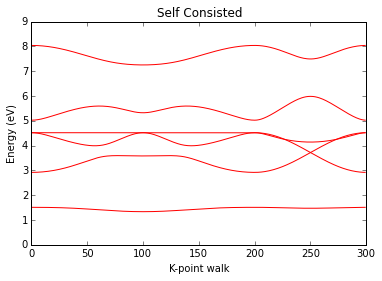

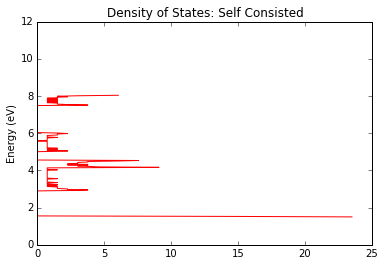

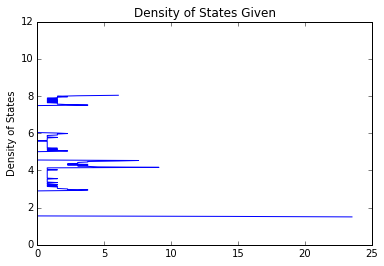

In [129]:
print i
print md
print nd
eigenvals=numpy.zeros((6,3*Nk))
bands=numpy.zeros((6,3*Nk))

for i in range(3):
    for j in range(Nk):
        if i==0:
            kx=j*dk
            ky=0.
        if i==1:
            kx=math.pi
            ky=j*dk
        if i==2:
            kx=math.pi-j*dk
            ky=math.pi-j*dk
        H=H=Hamiltonian2(kx,ky, np, mp, nd, md, Ud, Up, Delta0, TBpara)   
        E,V = la.eig(H)
        eigenvals[:,i*Nk+j]=numpy.real(E)
        
        

for ii in range(len(eigenvals[0,:])):
    bands[:,ii]=numpy.sort(eigenvals[:,ii])
for ii in range(6):
    a=4
    pyplot.plot(bands[ii,:], 'r')
    #pyplot.plot(theory_bands[ii,:], 'g--', lw=3)
    
    
pyplot.title("Self Consisted")
pyplot.ylabel("Energy (eV)")
pyplot.xlabel("K-point walk")
pyplot.ylim(0,9)

N=100
kx=numpy.linspace(-1.*math.pi, math.pi, N)
ky=numpy.linspace(-1.*math.pi, math.pi, N)

E=numpy.zeros(6.*N*N)
count=0;
for i in range(len(kx)):
    for j in range(len(ky)):
        H=Hamiltonian(kx[i],ky[i], np, mp, nd, md)    
        D,V = la.eig(H)
        for n in range(6):
            E[count]=numpy.real(D[n])
            count+=1

Emin=min(E)        
Emax=max(E)
#n_bins=500
Es=numpy.linspace(Emin,Emax,n_bins)
hist, bin_edge= numpy.histogram(E,bins=Es)
    
S=sum((Es[1]-Es[0])*hist)
c=6./S
hc=c*hist
pyplot.figure()
pyplot.plot(hc,bin_edge[1:], 'r')  
pyplot.title("Density of States: Self Consisted")
pyplot.ylabel("Energy (eV)")
pyplot.ylim(0,12)

pyplot.figure()
pyplot.plot(Theory_hc,Theory_Es[1:], 'b')  
pyplot.title("Density of States Given")
pyplot.ylabel("Energy (eV)")
pyplot.ylabel("Density of States")
pyplot.ylim(0,12)

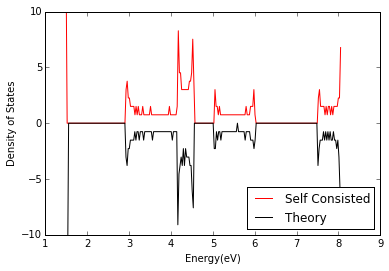

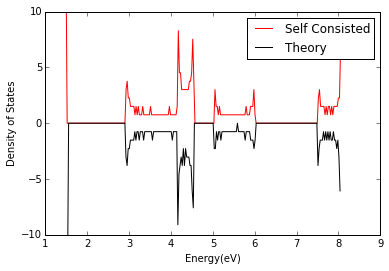

In [123]:
hc_theory=Theory_hc*-1
pyplot.plot(bin_edge[1:],hc, 'r', label='Self Consisted')
pyplot.plot(Theory_Es[1:],hc_theory, 'k', label='Theory')
  
pyplot.xlim(1,9)
pyplot.ylim(-10,10)
pyplot.ylabel("Density of States")
pyplot.xlabel("Energy(eV)")
pyplot.legend(loc=4)

pyplot.figure()
pyplot.plot(bin_edge[1:],hc, 'r', label='Self Consisted')
pyplot.plot(Theory_Es[1:],hc_theory, 'k', label='Theory')
  
pyplot.xlim(1,9)
pyplot.ylim(-10,10)
pyplot.ylabel("Density of States")
pyplot.xlabel("Energy(eV)")
pyplot.legend(loc=0)